<a href="https://colab.research.google.com/github/Dsasank81/AICTE-Project/blob/main/DL_EX_2%2C3%2C4%2C5%2C6%2C7%2C8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
625/625 [==============================] - 44s 69ms/step - loss: 0.4177 - accuracy: 0.7892 - val_loss: 0.3222 - val_accuracy: 0.8658
Epoch 2/10
625/625 [==============================] - 39s 63ms/step - loss: 0.0702 - accuracy: 0.9768 - val_loss: 0.4519 - val_accuracy: 0.8566
Epoch 3/10
625/625 [==============================] - 42s 67ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.6290 - val_accuracy: 0.8528
Epoch 4/10
625/625 [==============================] - 41s 66ms/step - loss: 4.2413e-04 - accuracy: 1.0000 - val_loss: 0.6841 - val_accuracy: 0.8572
Epoch 5/10
625/625 [==============================] - 39s 62ms/step - loss: 7.1731e-05 - accuracy: 1.0000 - val_loss: 0.7122 - val_accuracy: 0.8550
Epoch 6/10
625/625 [==============================] - 39s 62ms/step - loss: 4.0838e-05 - accuracy: 1.0000 - val_loss: 0.7322 - val_accuracy: 0.8556
Epoch 7/10
625/625 [==============================] - 39s 6

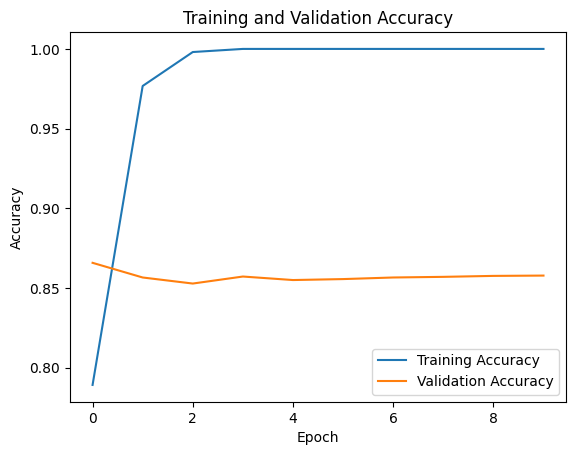

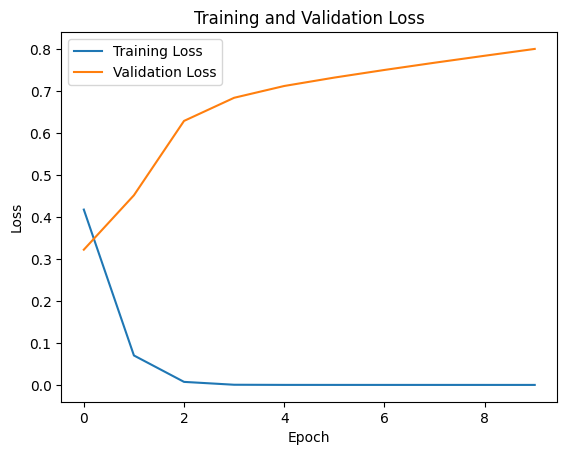

In [ ]:
# EX-2
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import matplotlib.pyplot as plt
num_words = 10000
(x_train, y_train), (x_test, y_test) =imdb.load_data(num_words=num_words)
maxlen = 200 # Limit the length of reviews to 200 words
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
model = Sequential()
model.add(Embedding(num_words, 128, input_length=maxlen))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Binary classification, so use sigmoid activation
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2110848/2110848 [==============================] - 0s 0us/step
8982 2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
550378/550378 [==============================] - 0s 0us/step
Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.8216 - accuracy: 0.4568 - val_loss: 1.9138 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5888 - accuracy: 0.6865 - val_loss: 1.3990 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.1934 - accuracy: 0.7417 - val_loss: 1.1946 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.9766 - accuracy: 0.7881 - val_loss: 1.0825 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 1s 75ms/step - loss: 0.8082 - accuracy: 0.8252 - val_loss: 1.0053 - val_accuracy: 0.7810
Epoch 6/20
16/16

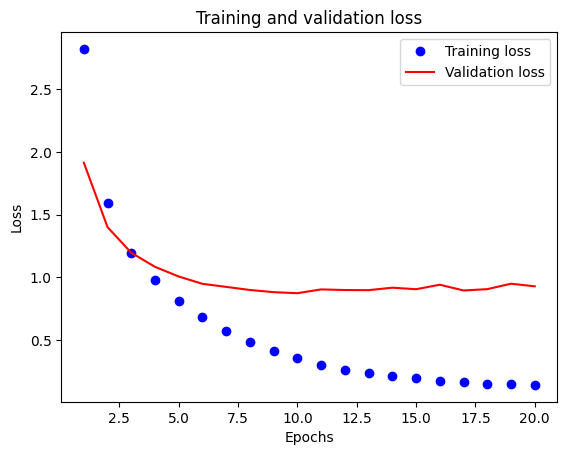

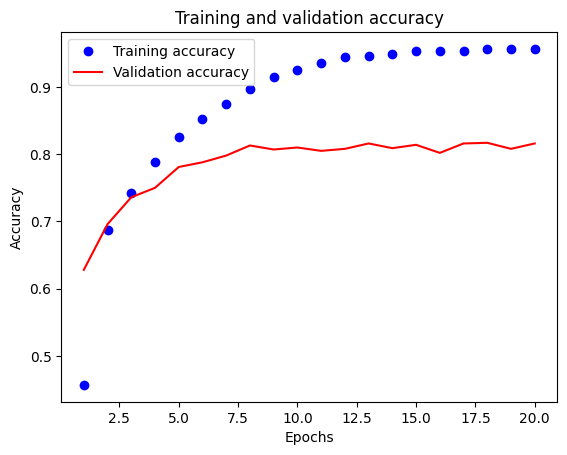

In [ ]:
# EX-3
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf # import tensor flow
import numpy as np
import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data), len(test_data))
print(train_data[10])
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in
word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i
in train_data[0]])
train_labels[10]
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)#1
x_test = vectorize_sequences(test_data)#2
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)#1
one_hot_test_labels = to_one_hot(test_labels)#2
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
model = keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
13/13 [==============================] - 2s 37ms/step - loss: 585.5118 - val_loss: 494.6896
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 548.6050 - val_loss: 460.0018
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 507.1336 - val_loss: 417.5295
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 454.2656 - val_loss: 362.2052
Epoch 5/100
13/13 [==============================] - 0s 14ms/step - loss: 385.5853 - val_loss: 293.8669
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 303.0037 - val_loss: 215.5199
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 214.7424 - val_loss: 138.5670
Epoch 8/100
13/13 [==============================] - 0s 9ms/step - loss: 134.6738 - val_loss: 83.4191
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 85.2678 - val_loss: 54.8629
Epoch 10/100
13/13 [==============================] - 0s 12ms/step - l

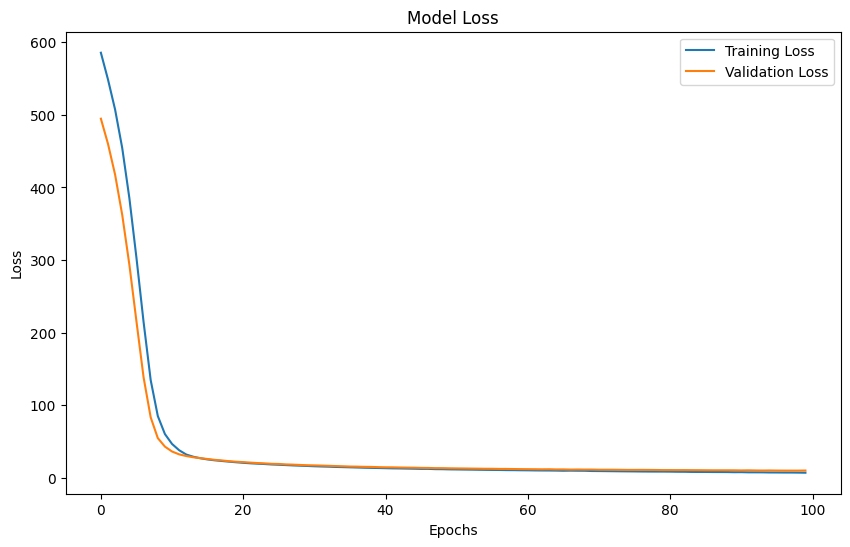

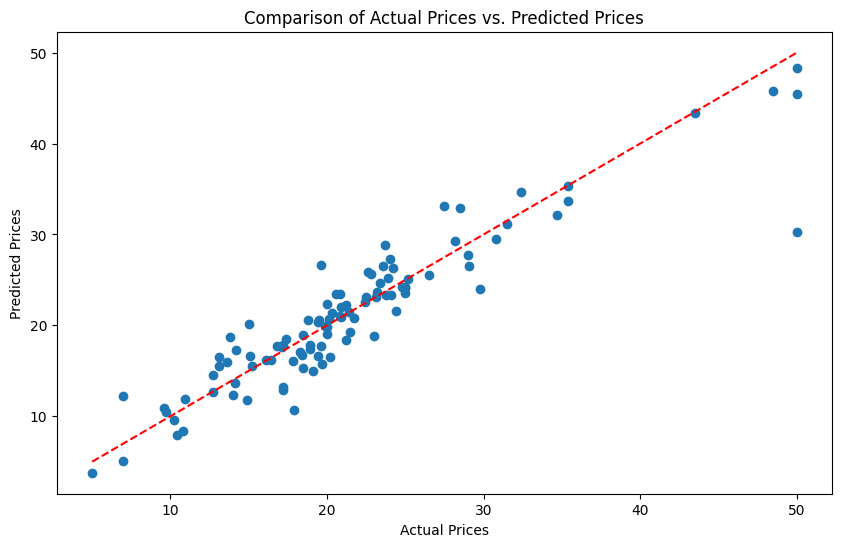

In [ ]:
# EX-4
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Load the Boston Housing Price dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("boston_housing.csv", names=column_names,
header=None, delim_whitespace=True)
# Separate features (X) and target variable (y)
X = data.drop(columns=['MEDV']) # Drop the target column
y = data['MEDV']
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
test_size=0.2, random_state=42)
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu',
input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # Output layer
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
verbose=1, validation_data=(X_test, y_test))
# Predict house prices using the trained model
y_pred = model.predict(X_test).flatten() # Flatten predictions
# Calculate the average of actual prices
average_actual_prices = np.mean(y_test)
# Calculate the average of predicted prices
average_predicted_prices = np.mean(y_pred)
print("Average Actual Prices:", average_actual_prices)
print("Average Predicted Prices:", average_predicted_prices)
# Plot loss during training
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot a comparison chart
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Actual Prices vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 59s 61ms/step - loss: 0.1788 - accuracy: 0.9459 - val_loss: 0.0545 - val_accuracy: 0.9824
Epoch 2/5
938/938 [==============================] - 66s 70ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0299 - val_accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.0301 - val_accuracy: 0.9915


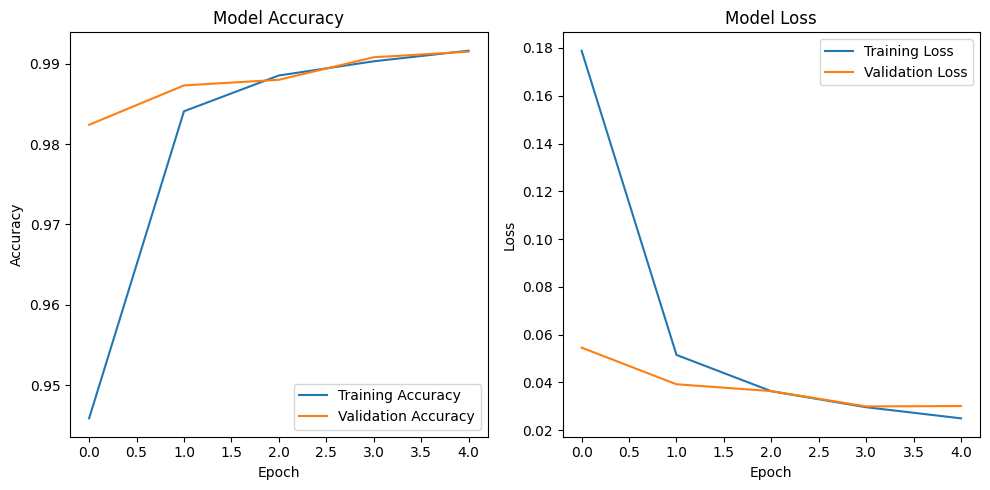

313/313 [==============================] - 3s 9ms/step - loss: 0.0301 - accuracy: 0.9915
Test loss: 0.03009464032948017
Test accuracy: 0.9915000200271606


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Load the MNIST dataset
(train_images, train_labels),(test_images, test_labels) =mnist.load_data()
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28,
1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32')/ 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,
28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
batch_size=64, validation_data=(test_images, test_labels))
# Plot training history
plt.figure(figsize=(10, 5))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Found 22 images belonging to 3 classes.
Found 22 images belonging to 3 classes.
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7534 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 237ms/step - loss: -0.2020 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 224ms/step - loss: -1.3888 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 207ms/step - loss: -3.4558 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 200ms/step - loss: -7.1644 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 205ms/step - loss: -13.1375 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 224ms/step - loss: -22.9772 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 217ms/step - loss: -38.6926 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 217ms/step - loss: -60.5427 - accuracy: 0.5000
Epoch 10/10
1/1 [========

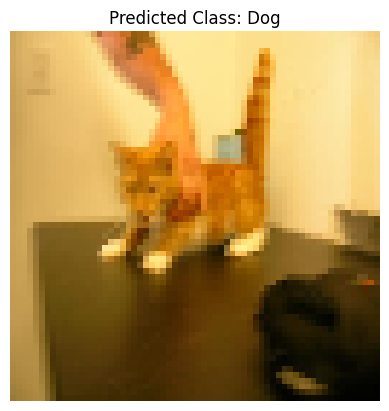

In [ ]:
# EX-6
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
import matplotlib.pyplot as plt
# Data directories
train_dir = 'train'
test_dir = 'test'
# Image dimensions and batch size
img_width, img_height = 64, 64
batch_size = 32
# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
 shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(train_dir,

target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='binary')
# Load and preprocess testing data
test_generator = test_datagen.flow_from_directory(test_dir,

target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='binary')
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width,
img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(train_generator,
steps_per_epoch=len(train_generator), epochs=10)
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator,
steps=len(test_generator))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
# Randomly choose an image from the test set
random_index = np.random.randint(0, len(test_generator))
test_image_path = test_generator.filepaths[random_index]
# Load and preprocess the chosen image
test_image = load_img(test_image_path, target_size=(img_width,
img_height))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0) / 255
# Predict the class of the chosen image
prediction = model.predict(test_image_array)[0]
# Plot the image and its prediction
plt.imshow(test_image)
if prediction > 0.5:
 plt.title("Predicted Class: Dog")
else:
 plt.title("Predicted Class: Cat")
plt.axis('off')
plt.show()


In [ ]:
# EX-7
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications import VGG16

def classify_image_vgg16(image_path):
    # Load the VGG16 model pre-trained on ImageNet data
    model = VGG16(weights='imagenet', include_top=True)

    try:
        # Load an image file
        img = image.load_img(image_path, target_size=(224, 224))

        # Convert the image to a numpy array
        x = image.img_to_array(img)

        # Add a dimension to the array to match the input shape of the model
        x = np.expand_dims(x, axis=0)

        # Preprocess the input data (normalize pixel values and resize)
        x = preprocess_input(x)

        # Make predictions
        predictions = model.predict(x)

        # Decode the predictions
        decoded_predictions = decode_predictions(predictions, top=3)[0]

        # Print the top 3 predictions
        for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
            print("{}. {}: {:.2f}%".format(i + 1, label, score * 100))

    except FileNotFoundError:
        print("Error: Image file not found.")
    except Exception as e:
        print("An error occurred:", e)

if __name__ == "__main__":
    # Replace 'image_path.jpg' with the path to your image file
    image_path = 'car.png'
    classify_image_vgg16(image_path)


35363/35363 [==============================] - 0s 0us/step
1. sports_car: 53.79%
2. convertible: 35.64%
3. beach_wagon: 4.46%


In [ ]:
# EX-8 (A)
import tensorflow as tf

def one_hot_encode_words(text):
    # Tokenize the text into words
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts([text])

    # Convert words to sequences of integer indices
    sequences = tokenizer.texts_to_sequences([text])[0]

    # Convert integer indices to one-hot encoded vectors
    one_hot_encoded = tf.keras.utils.to_categorical(sequences)

    return one_hot_encoded, tokenizer.word_index

# Example usage:
text = "a one a the "
encoded_text, word_to_index = one_hot_encode_words(text)
print("Encoded text:")
print(encoded_text)
print("Word to index mapping:")
print(word_to_index)


Encoded text:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
Word to index mapping:
{'a': 1, 'one': 2, 'the': 3}


In [ ]:
# EX-8(B)
import tensorflow as tf

def one_hot_encode_characters(text):
    # Create a set of unique characters
    unique_chars = sorted(set(text))

    # Create a mapping from characters to indices
    char_to_index = {char: i for i, char in enumerate(unique_chars)}

    # Convert characters to integer indices
    indices = [char_to_index[char] for char in text]

    # Convert integer indices to one-hot encoded vectors
    one_hot_encoded = tf.one_hot(indices, len(unique_chars))

    return one_hot_encoded.numpy(), char_to_index


Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5709 - accuracy: 0.7027 - val_loss: 0.4803 - val_accuracy: 0.7658
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3853 - accuracy: 0.8292 - val_loss: 0.4792 - val_accuracy: 0.7671
Epoch 3/10
782/782 [==============================] - 7s 8ms/step - loss: 0.2577 - accuracy: 0.9047 - val_loss: 0.5179 - val_accuracy: 0.7579
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1486 - accuracy: 0.9612 - val_loss: 0.5774 - val_accuracy: 0.7480
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0796 - accuracy: 0.9859 - val_loss: 0.6447 - val_accuracy: 0.7428
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0416 - accuracy: 0.9962 - val_loss: 0.7159 - val_accuracy: 0.7380
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0218 - accuracy: 0.9991 - val_loss: 0.7858 - val_accuracy: 0.7365
Epoch 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


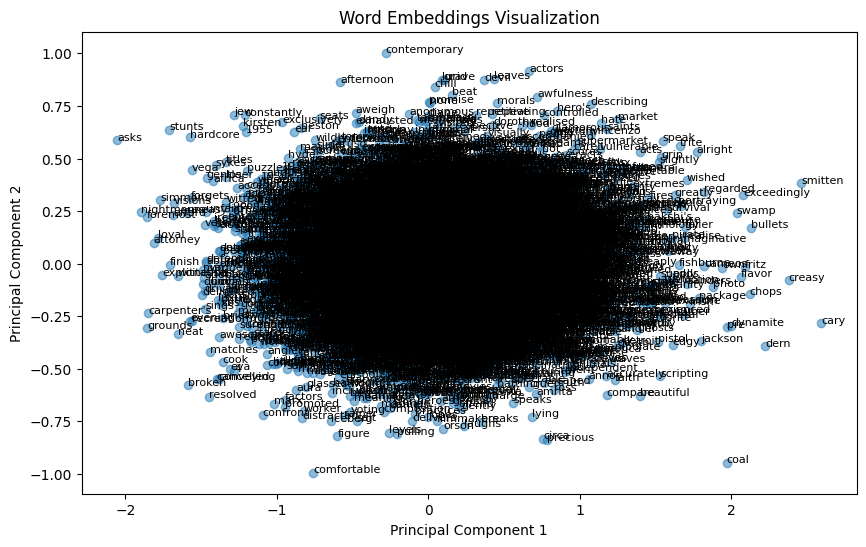

1/1 [==============================] - 0s 53ms/step
Movie Response: Negative


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the model
embedding_dim = 50
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Extract word embeddings
word_embeddings = model.layers[0].get_weights()[0]

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_embeddings)

# Visualize word embeddings
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
words = ['<PAD>'] + [word for word, idx in imdb.get_word_index().items() if idx < max_features]
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), size=8)
plt.title('Word Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Load IMDB dataset
max_features = 10000  # consider only the top 10,000 most common words
maxlen = 100  # cut reviews after 100 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Preprocess data: pad sequences to the same length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Define the model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 13s 70ms/step - loss: 0.5903 - acc: 0.6718 - val_loss: 0.4349 - val_acc: 0.8012
Epoch 2/10
157/157 [==============================] - 11s 70ms/step - loss: 0.3630 - acc: 0.8469 - val_loss: 0.3586 - val_acc: 0.8414
Epoch 3/10
157